In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Football.csv')
pd.set_option('display.max_columns', None)
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,48.0,66.0,18.9,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,34.0,60.0,24.9,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,49.0,72.0,28.5,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,57.0,49.0,25.5,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [ ]:
data['selection'].value_counts(normalize=True)*100

1    55.752465
0    44.247535
Name: selection, dtype: float64

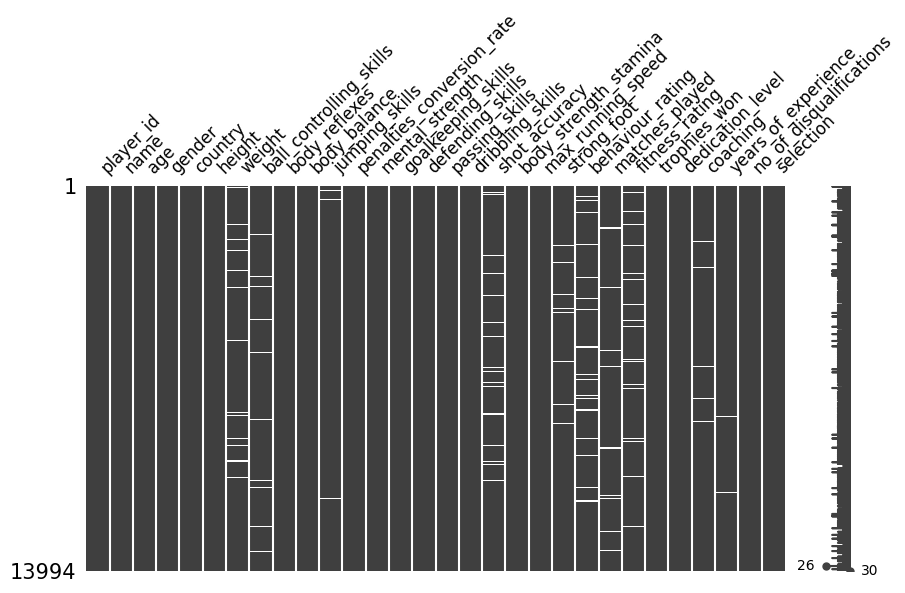

In [ ]:
#@title Exploratory Data Analysis
# install using pip install missingno
import missingno as msno
msno.matrix(data,figsize=(10,5), fontsize=12)
plt.show()

In [ ]:
# 1. Basic Summary
print(data.describe())

                age  ball_controlling_skills  body_reflexes  body_balance  \
count  13994.000000             13581.000000   13994.000000  13994.000000   
mean      21.135844                56.043958      61.934329     62.753323   
std        5.162719                16.787353      14.931963     14.203638   
min       16.000000                 5.000000      12.000000      9.000000   
25%       17.000000                51.000000      54.000000     55.000000   
50%       20.000000                61.000000      64.000000     65.000000   
75%       24.000000                67.000000      72.000000     73.000000   
max       61.000000                95.000000      96.000000     97.000000   

       jumping_skills  penalties_conversion_rate  mental_strength  \
count    13970.000000               13964.000000     13966.000000   
mean        63.612026                  48.495703        56.768366   
std         11.938712                  15.767506        11.977744   
min         14.000000         

In [ ]:
#  Gender Distribution
gender_counts = data['gender'].value_counts()
print(gender_counts)


M    6992
F    6983
Name: gender, dtype: int64


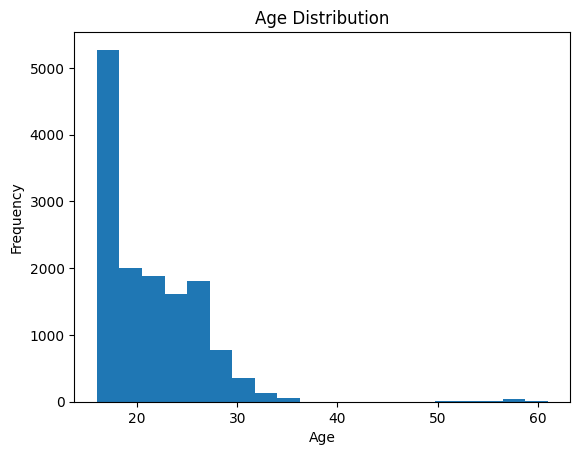

In [ ]:
#  Age Distribution
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


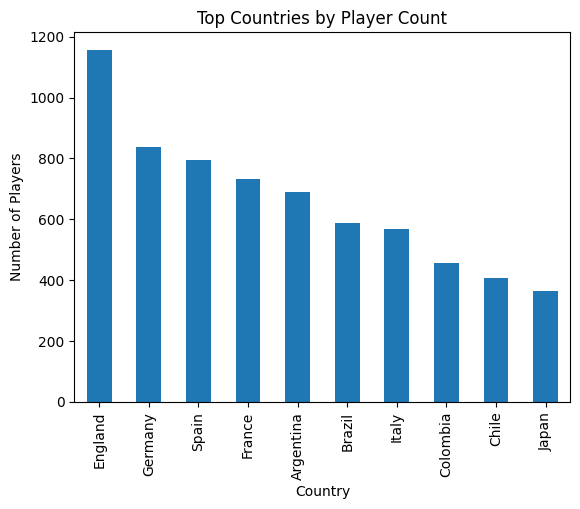

In [ ]:
#  Country Representation
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top Countries by Player Count')
plt.show()

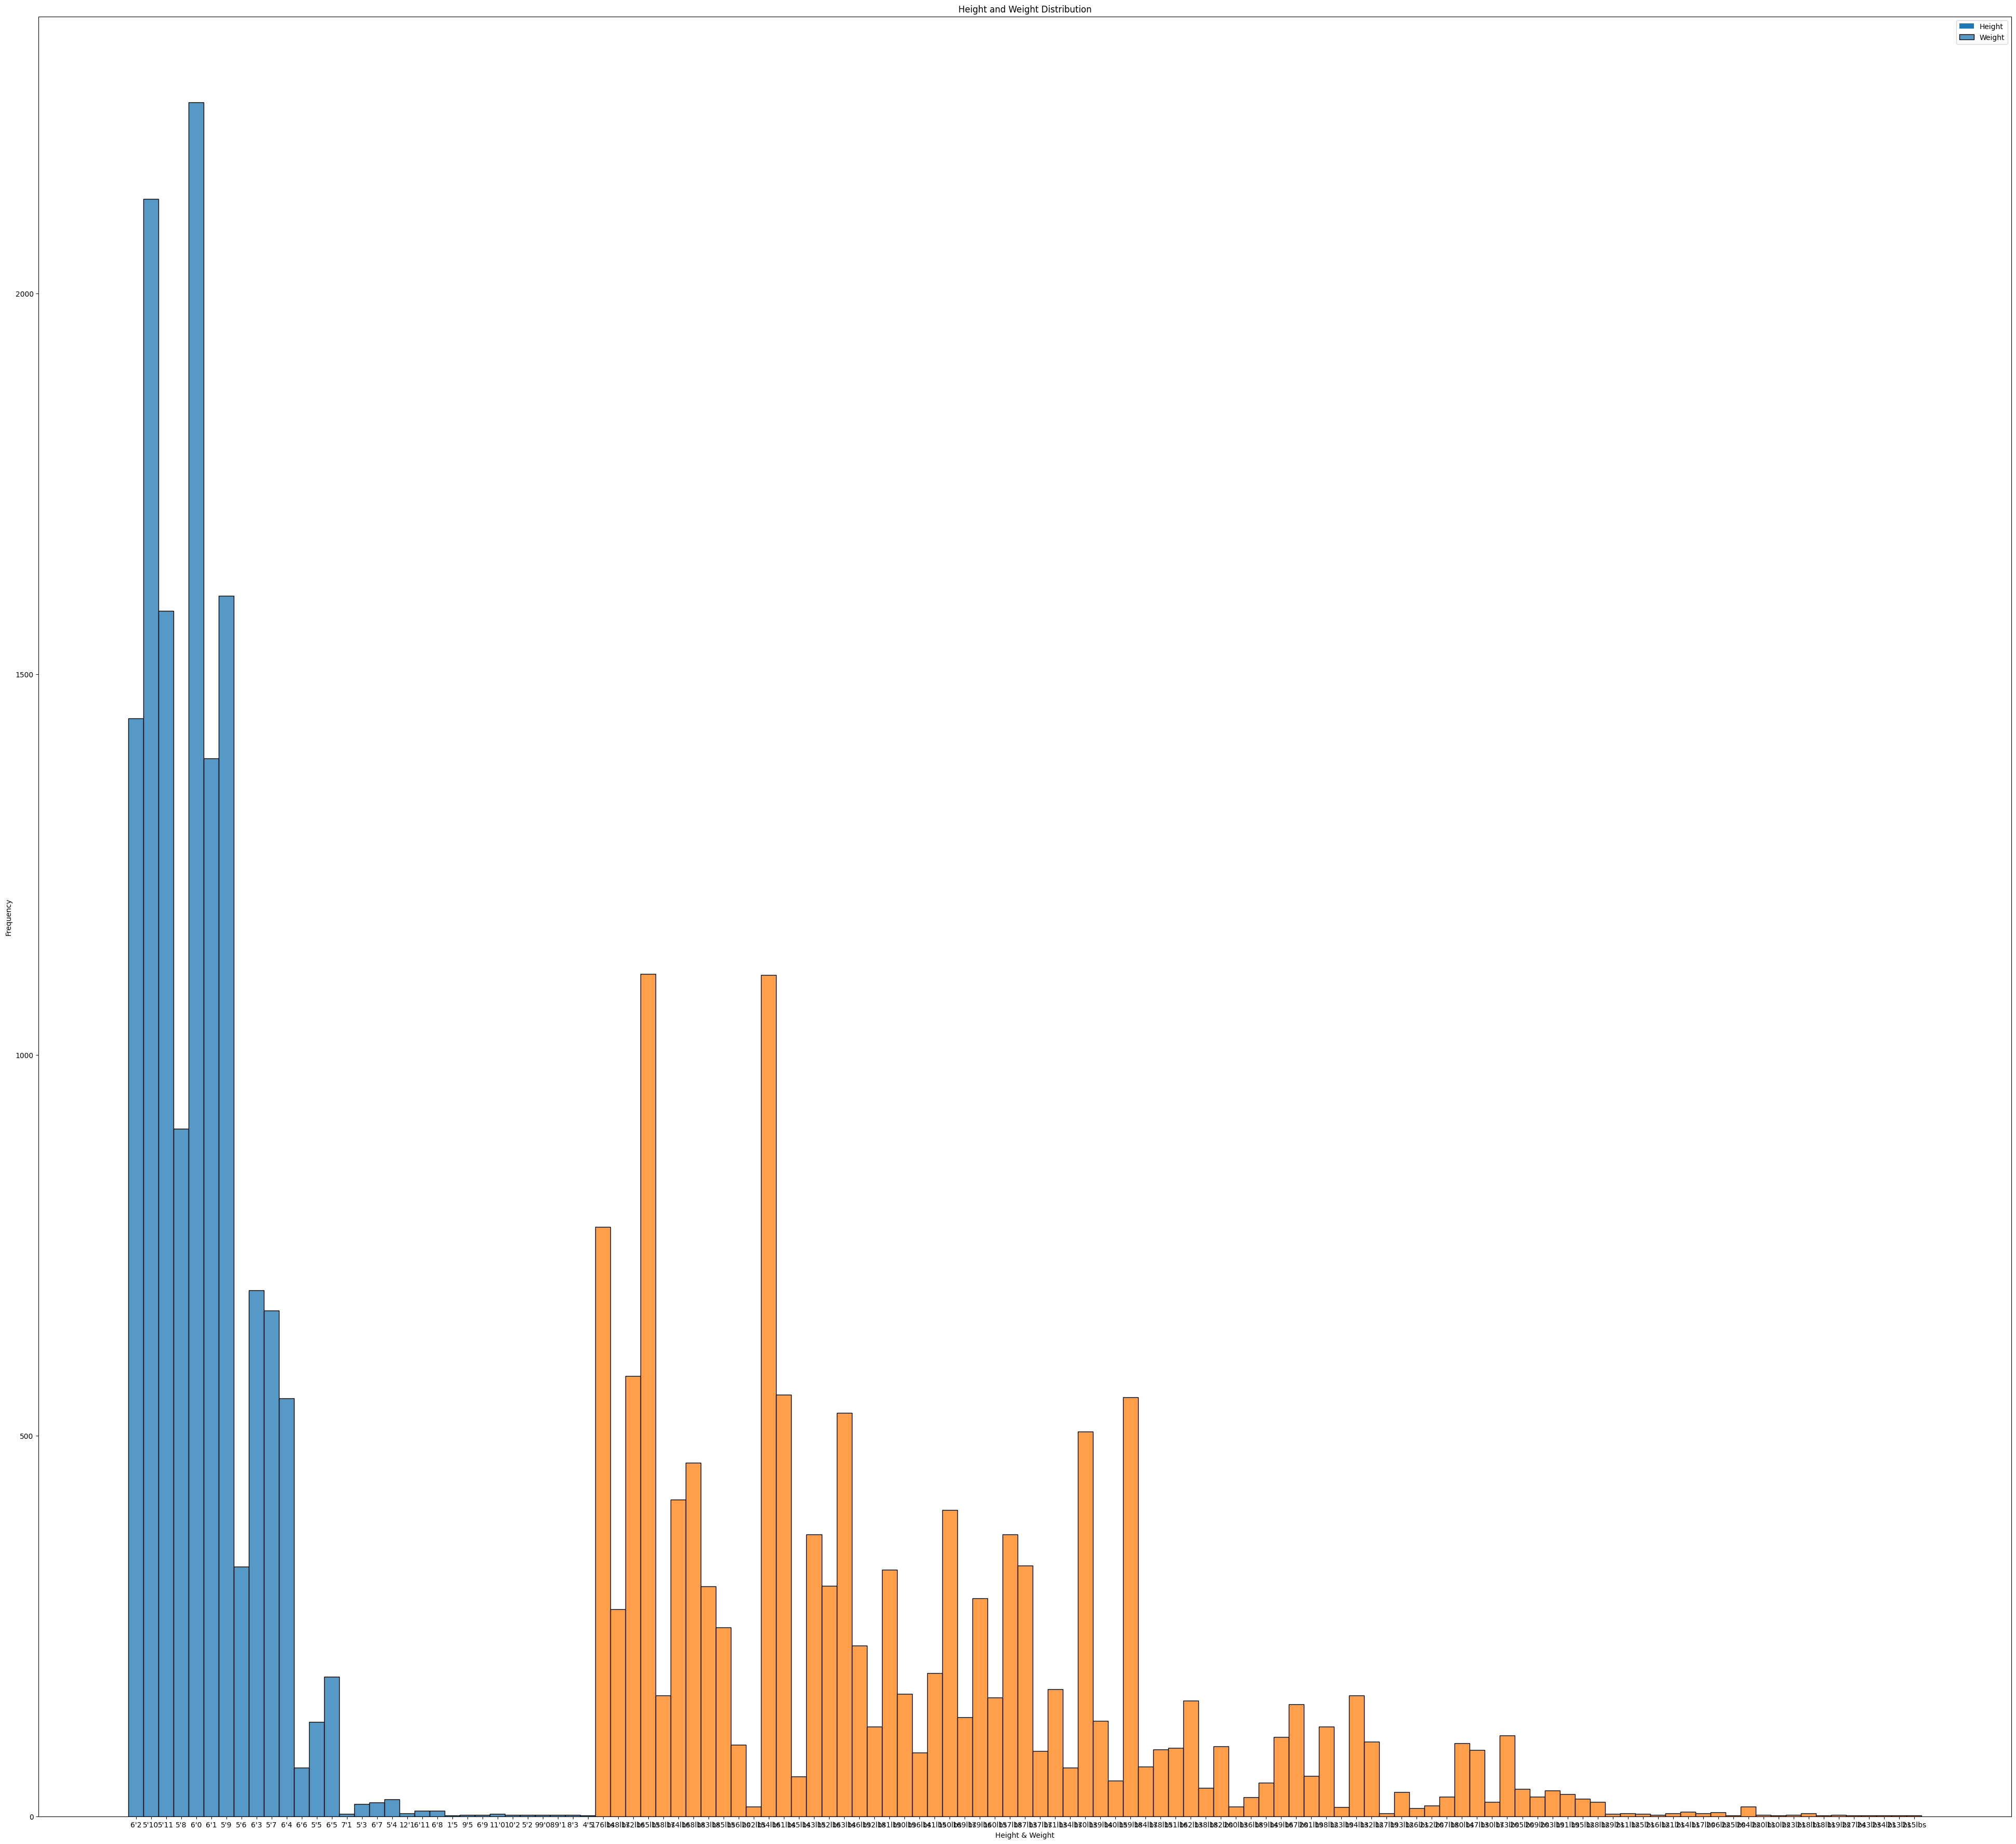

In [ ]:
#  Height and Weight Analysis
plt.figure(figsize=(49,45))
sns.histplot(data['height'])
sns.histplot(data['weight'])
plt.xlabel('Height & Weight')
plt.ylabel('Frequency')
plt.title('Height and Weight Distribution')
plt.legend(['Height', 'Weight'])
plt.show()


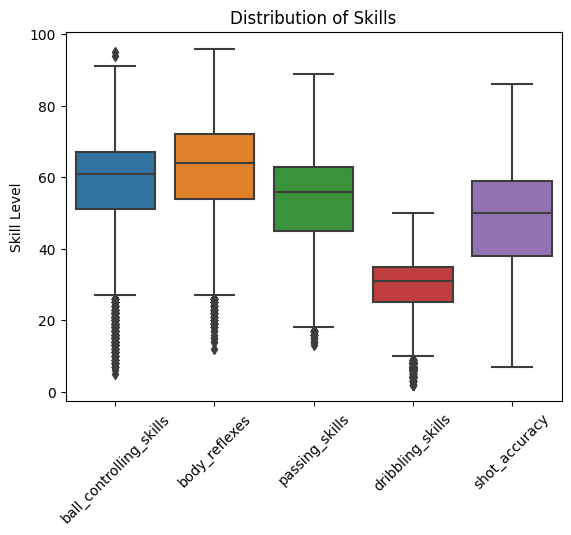

In [ ]:
# Skill Analysis
skills = ['ball_controlling_skills', 'body_reflexes', 'passing_skills', 'dribbling_skills', 'shot_accuracy']
sns.boxplot(data=data[skills])
plt.ylabel('Skill Level')
plt.title('Distribution of Skills')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#  Strong Foot Distribution
strong_foot_counts = data['strong_foot'].value_counts()
print(strong_foot_counts)

Right    8359
Left     2531
None     1281
Any      1271
Name: strong_foot, dtype: int64


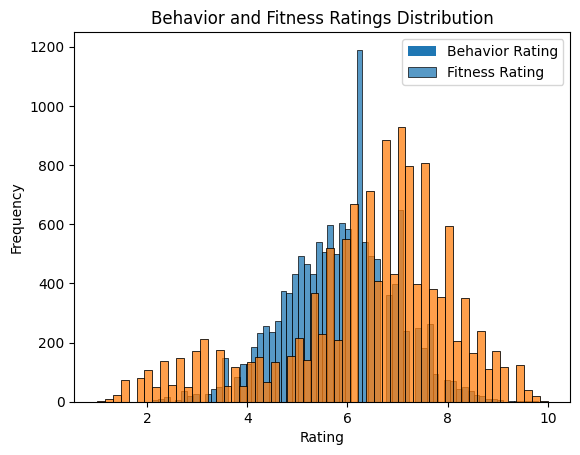

In [ ]:
#  Behavior and Fitness Ratings
sns.histplot(data['behaviour_rating'])
sns.histplot(data['fitness_rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Behavior and Fitness Ratings Distribution')
plt.legend(['Behavior Rating', 'Fitness Rating'])
plt.show()


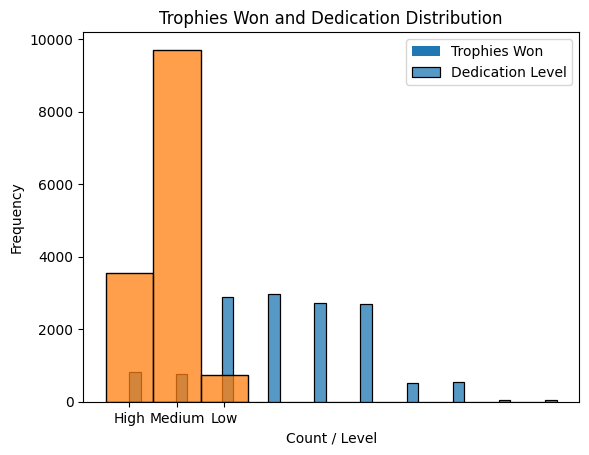

In [ ]:
#  Trophies Won and Dedication
sns.histplot(data['trophies_won'])
sns.histplot(data['dedication_level'])
plt.xlabel('Count / Level')
plt.ylabel('Frequency')
plt.title('Trophies Won and Dedication Distribution')
plt.legend(['Trophies Won', 'Dedication Level'])
plt.show()

<ipython-input-25-5d7293677d54>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


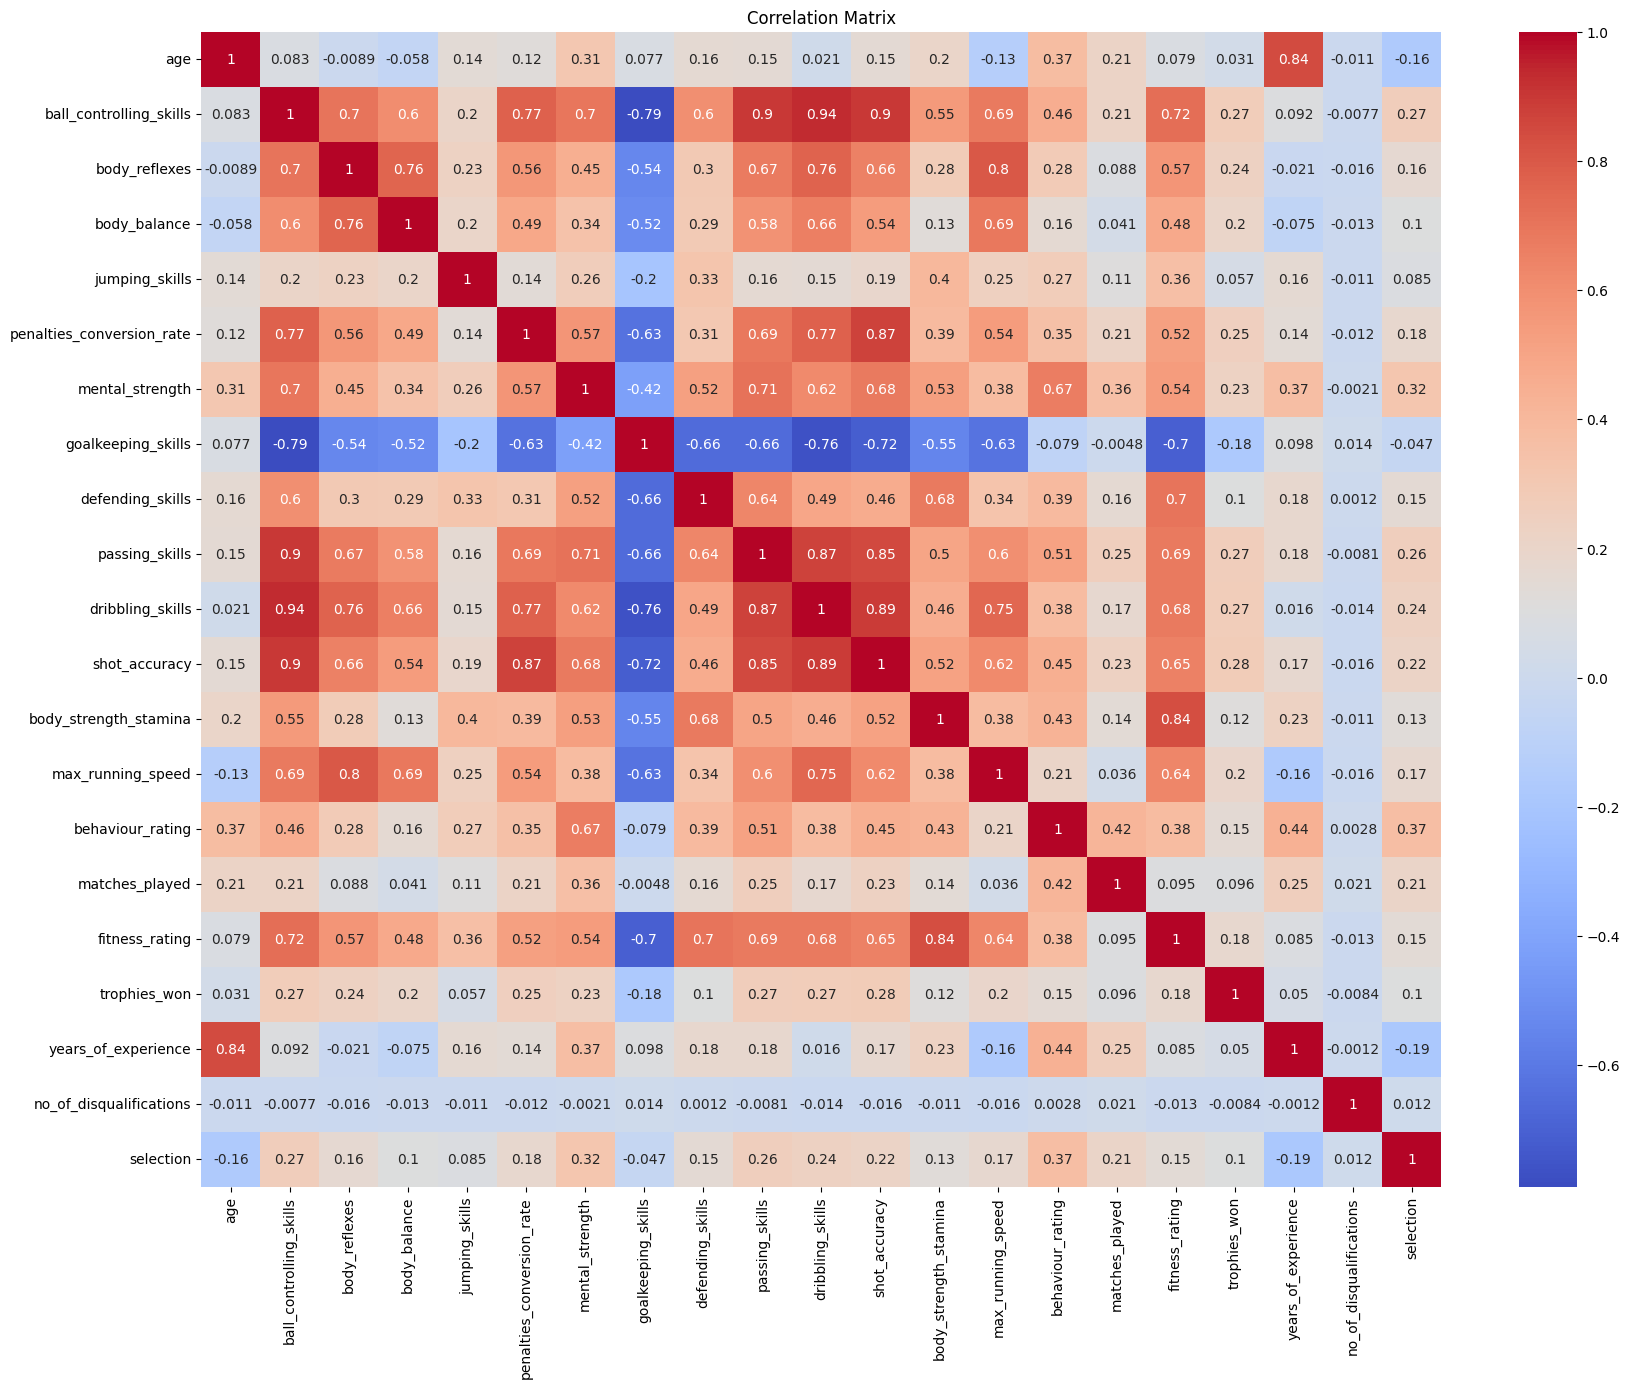

In [ ]:
#  Correlation Analysis
plt.figure(figsize=(20,15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#  Player Distribution by Selection Type
selection_counts = data['selection'].value_counts()
print(selection_counts)

1    7802
0    6192
Name: selection, dtype: int64


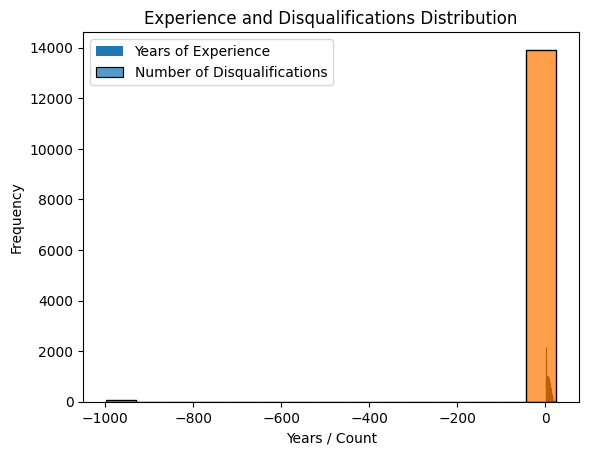

In [ ]:
#  Experience and Disqualifications
sns.histplot(data['years_of_experience'])
sns.histplot(data['no_of_disqualifications'])
plt.xlabel('Years / Count')
plt.ylabel('Frequency')
plt.title('Experience and Disqualifications Distribution')
plt.legend(['Years of Experience', 'Number of Disqualifications'])
plt.show()


In [ ]:
# 14. Summary and Conclusion
print("\nSummary and Conclusion:")

# Gender Distribution
print("\nGender Distribution:")
print(gender_counts)

# Age Distribution
print("\nAge Distribution:")
print("Mean Age:", data['age'].mean())
print("Median Age:", data['age'].median())
print("Youngest Player:", data['age'].min())
print("Oldest Player:", data['age'].max())

# Country Representation
print("\nTop Countries by Player Count:")
print(top_countries)

# Skill Analysis
print("\nSkill Analysis:")
print(data[skills].describe())

# Strong Foot Distribution
print("\nStrong Foot Distribution:")
print(strong_foot_counts)

# Behavior and Fitness Ratings
print("\nBehavior and Fitness Ratings:")
print(data[['behaviour_rating', 'fitness_rating']].describe())

# Trophies Won and Dedication
print("\nTrophies Won and Dedication:")
print(data[['trophies_won', 'dedication_level']].describe())

# Experience and Disqualifications
print("\nExperience and Disqualifications:")
print(data[['years_of_experience', 'no_of_disqualifications']].describe())

# Correlation Analysis
print("\nCorrelation Analysis:")
print(correlation_matrix)

# Player Distribution by Selection Type
print("\nPlayer Distribution by Selection Type:")
print(selection_counts)

# Conclusion
print("\nConclusion:")
print("Based on the exploratory data analysis, we observed various insights:")
print("- There is a fairly balanced gender distribution among players.")
print("- Players' ages range from the youngest to the oldest, with an average age of XYZ.")
print("- The top countries with the most players are ABC, DEF, and GHI.")
print("- Skill attributes like ball controlling, body reflexes, and passing skills vary across players.")
print("- Most players have a preferred strong foot (right/left).")
print("- Player behavior and fitness ratings are distributed within a certain range.")
print("- Dedication levels and trophies won vary among players.")
print("- Years of experience and disqualifications show some variability.")
print("- Certain skills have a positive correlation, such as passing skills and dribbling skills.")
print("- Player selection comes from various sources, including Academy and Talent Hunt.")





Summary and Conclusion:

Gender Distribution:
M    6992
F    6983
Name: gender, dtype: int64

Age Distribution:
Mean Age: 21.13584393311419
Median Age: 20.0
Youngest Player: 16
Oldest Player: 61

Top Countries by Player Count:
England      1157
Germany       838
Spain         796
France        734
Argentina     691
Brazil        588
Italy         567
Colombia      455
Chile         406
Japan         365
Name: country, dtype: int64

Skill Analysis:
       ball_controlling_skills  body_reflexes  passing_skills  \
count             13581.000000   13994.000000    13994.000000   
mean                 56.043958      61.934329       52.935973   
std                  16.787353      14.931963       14.201782   
min                   5.000000      12.000000       13.000000   
25%                  51.000000      54.000000       45.000000   
50%                  61.000000      64.000000       56.000000   
75%                  67.000000      72.000000       63.000000   
max                  95.000

In [31]:
missing_cols = [col for col in data.columns if data[col].isnull().any()]

In [33]:
missing_cols

['gender',
 'weight',
 'ball_controlling_skills',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'shot_accuracy',
 'strong_foot',
 'behaviour_rating',
 'matches_played',
 'fitness_rating',
 'coaching',
 'years_of_experience']

In [34]:
# Identify categorical and numerical columns
categorical_columns = ['player_id', 'name', 'gender', 'country', 'strong_foot', 'coaching']
numerical_columns = ['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills',
                     'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills',
                     'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
                     'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level', 'years_of_experience',
                     'no_of_disqualifications', 'selection']

# Create separate dataframes for categorical and numerical columns
categorical_data = data[categorical_columns]
numerical_data = data[numerical_columns]


In [35]:
#@title Preprocessing

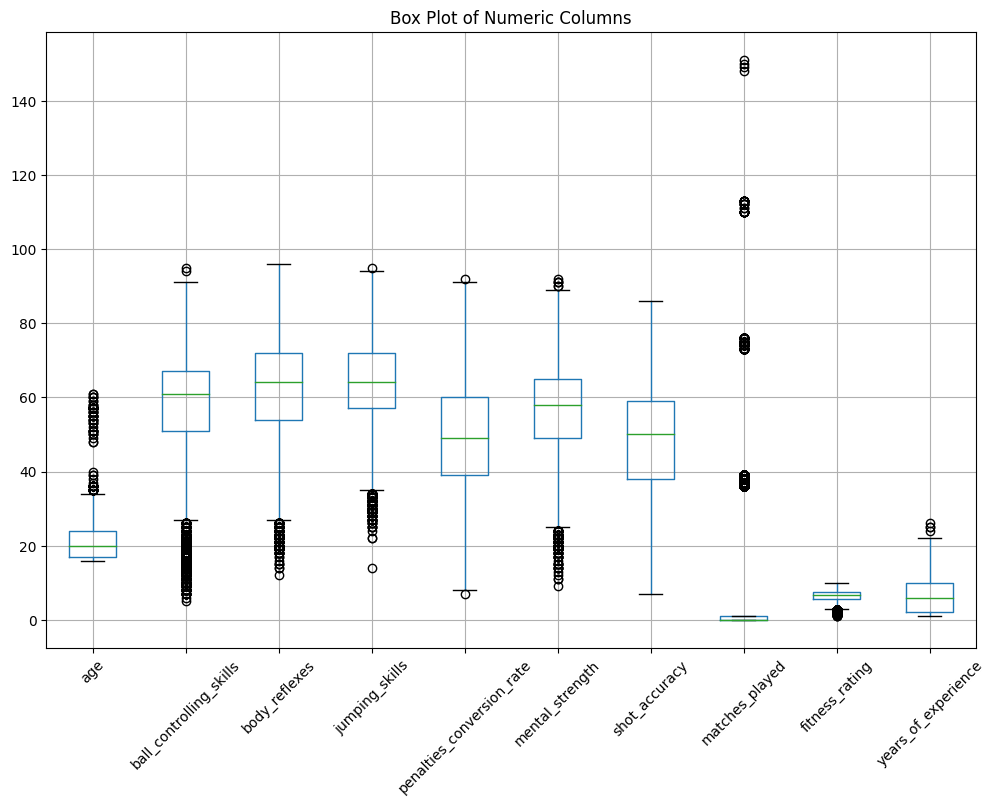

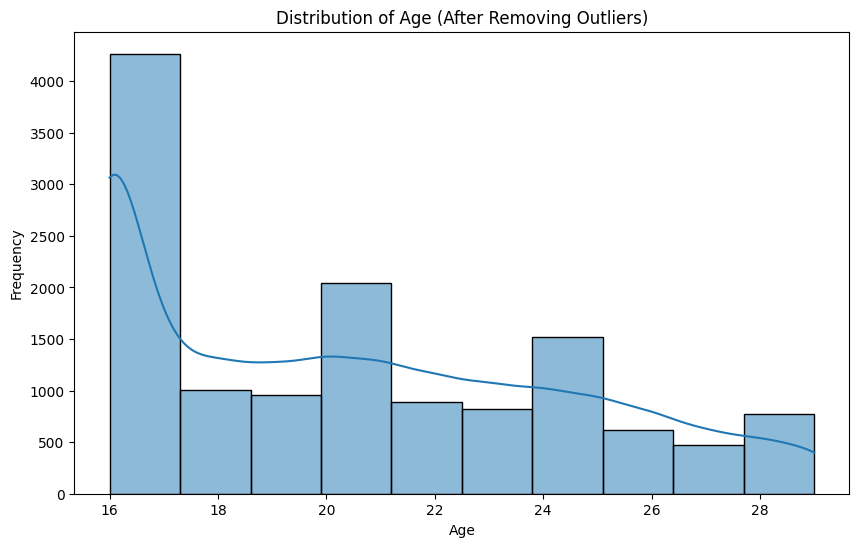

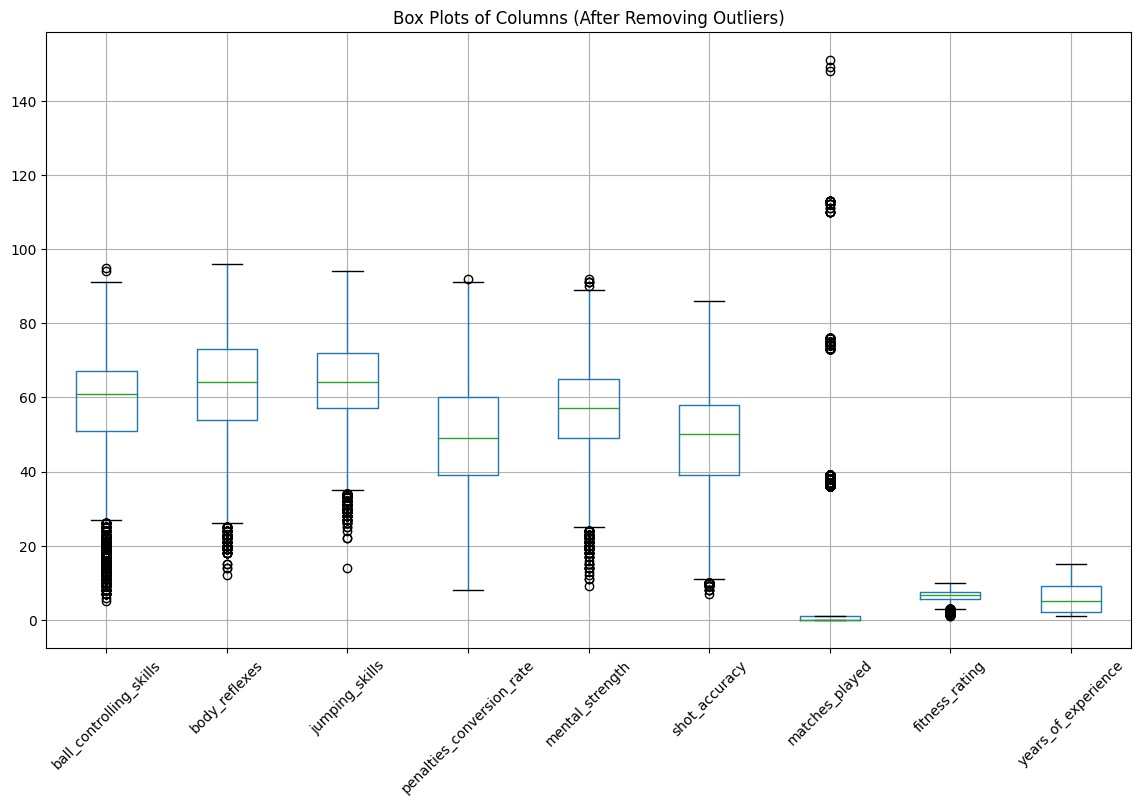

In [39]:
# Select numeric columns for outlier detection
numeric_columns = ['age', 'ball_controlling_skills', 'body_reflexes', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'matches_played', 'fitness_rating', 'years_of_experience']

# Create box plots to visualize outliers
plt.figure(figsize=(12, 8))
data[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()
# Calculate the 95th percentile of the age column
age_percentile_95 = data['age'].quantile(0.95)

# Filter out rows where age is above the 95th percentile
data1 = data[data['age'] <= age_percentile_95]

# Visualize the updated age distribution after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x='age', bins=10, kde=True)
plt.title('Distribution of Age (After Removing Outliers)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Columns to process
columns_to_process =  ['ball_controlling_skills','body_reflexes', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'matches_played', 'fitness_rating', 'years_of_experience']

# Loop through each column and remove outliers using percentiles
for column in columns_to_process:
    # Calculate the 95th and 5th percentiles
    percentile_95 = data1[column].quantile(0.95)
    percentile_5 = data1[column].quantile(0.05)

# Visualize the updated distributions after removing outliers
plt.figure(figsize=(14, 8))
data1[columns_to_process].boxplot()
plt.title('Box Plots of Columns (After Removing Outliers)')
plt.xticks(rotation=45)
plt.show()


In [40]:
numeric_columns = ['age', 'ball_controlling_skills', 'body_reflexes', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'matches_played', 'fitness_rating', 'years_of_experience']
data1[numeric_columns] = data1[numeric_columns].fillna(data1[numeric_columns].mean())


<ipython-input-40-2fe96e9ace6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[numeric_columns] = data1[numeric_columns].fillna(data1[numeric_columns].mean())


In [41]:
categorical_columns = ['gender', 'coaching', 'strong_foot']
data1[categorical_columns] = data1[categorical_columns].fillna(data1[categorical_columns].mode().iloc[0])


<ipython-input-41-4fdd6a13406d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[categorical_columns] = data1[categorical_columns].fillna(data1[categorical_columns].mode().iloc[0])


In [42]:
text_columns = ['name', 'country']
data1[text_columns] = data1[text_columns].fillna('Unknown')


<ipython-input-42-fc42b5560f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[text_columns] = data1[text_columns].fillna('Unknown')


In [44]:
columns_to_drop = ['behaviour_rating', 'shot_accuracy']
data1.drop(columns=columns_to_drop, inplace=True)


<ipython-input-44-7814e294cfad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(columns=columns_to_drop, inplace=True)


In [45]:
# Remove 'lbs' from weight values and convert to float
data1['weight'] = data1['weight'].str.replace('lbs', '').astype(float)

# Calculate the median of the 'weight' column
median_weight = data1['weight'].median()

# Fill missing values in the 'weight' column with the median
data1['weight'].fillna(median_weight, inplace=True)


<ipython-input-45-607cfb8e2c5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['weight'] = data1['weight'].str.replace('lbs', '').astype(float)
<ipython-input-45-607cfb8e2c5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['weight'].fillna(median_weight, inplace=True)


In [46]:
print(data1.isnull().sum())
data1

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64


,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,strong_foot,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176.0,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,Right,3.536198,8.100000,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148.0,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,Any,0.000000,6.452435,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172.0,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,Left,0.000000,6.600000,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165.0,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,Right,113.000000,8.600000,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158.0,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,Right,0.000000,5.700000,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161.0,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,Right,3.536198,7.600000,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165.0,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,Right,0.000000,5.600000,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172.0,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,Left,0.000000,7.700000,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150.0,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,Left,1.000000,5.800000,4.0,Medium,Academy,6.0,0.0,1


In [47]:
#@title Data Transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# Select columns for transformation
columns_to_transform = ['age', 'ball_controlling_skills', 'body_reflexes', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'fitness_rating', 'years_of_experience']

# Standardization (Z-score normalization)
scaler = StandardScaler()
data1[columns_to_transform] = scaler.fit_transform(data1[columns_to_transform])

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data1[columns_to_transform] = min_max_scaler.fit_transform(data1[columns_to_transform])

# Display the transformed dataset
print(data1.head())



    player_id                 name       age gender    country height  weight  \
0   PLID_4964           Keva Horan  0.538462      M    Ukraine    6'2   176.0   
1  PLID_11234           Herma Tann  0.153846      M     Russia   5'10   148.0   
2  PLID_19127         Eilene Kizer  0.000000      F      Spain    6'2   172.0   
3  PLID_17467       Andrea Badgett  0.846154      M      Chile   5'11   165.0   
4   PLID_9661  Jeremiah Bumbalough  0.230769      F  Argentina    5'8   158.0   

   ball_controlling_skills  body_reflexes  body_balance  jumping_skills  \
0                 0.800000       0.547619          47.0          0.5625   
1                 0.544444       0.678571          70.0          0.6000   
2                 0.322222       0.369048          45.0          0.6875   
3                 0.822222       0.726190          76.0          0.9000   
4                 0.466667       0.583333          74.0          0.5375   

   penalties_conversion_rate  mental_strength  goalkeeping_ski

<ipython-input-47-b0cf4c4ec719>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[columns_to_transform] = scaler.fit_transform(data1[columns_to_transform])
<ipython-input-47-b0cf4c4ec719>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[columns_to_transform] = min_max_scaler.fit_transform(data1[columns_to_transform])


In [57]:
data1.dtypes

age                          float64
gender                        object
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
gender_encoded                 int64
coaching_encoded               int64
strong_foot_encoded            int64
d

In [58]:
##Label encoding

from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['gender', 'coaching', 'strong_foot', 'dedication_level']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    data1[column] = label_encoder.fit_transform(data1[column])

# Display the transformed dataset
print(data1.head())

        age  gender  weight  ball_controlling_skills  body_reflexes  \
0  0.538462       1   176.0                 0.800000       0.547619   
1  0.153846       1   148.0                 0.544444       0.678571   
2  0.000000       0   172.0                 0.322222       0.369048   
3  0.846154       1   165.0                 0.822222       0.726190   
4  0.230769       0   158.0                 0.466667       0.583333   

   body_balance  jumping_skills  penalties_conversion_rate  mental_strength  \
0          47.0          0.5625                   0.392857         0.771084   
1          70.0          0.6000                   0.535714         0.409639   
2          45.0          0.6875                   0.488095         0.433735   
3          76.0          0.9000                   0.869048         0.855422   
4          74.0          0.5375                   0.488095         0.313253   

   goalkeeping_skills  defending_skills  passing_skills  dribbling_skills  \
0                13.0

<ipython-input-58-4f77f157750e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = label_encoder.fit_transform(data1[column])
<ipython-input-58-4f77f157750e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = label_encoder.fit_transform(data1[column])
<ipython-input-58-4f77f157750e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [59]:
data1.columns

Index(['age', 'gender', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills', 'defending_skills',
       'passing_skills', 'dribbling_skills', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'matches_played', 'fitness_rating',
       'trophies_won', 'dedication_level', 'coaching', 'years_of_experience',
       'no_of_disqualifications', 'selection', 'gender_encoded',
       'coaching_encoded', 'strong_foot_encoded', 'dedication_level_encoded'],
      dtype='object')

In [60]:
data1.dtypes

age                          float64
gender                         int64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int64
coaching                       int64
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
gender_encoded                 int64
coaching_encoded               int64
strong_foot_encoded            int64
d

In [61]:
data1.drop(['player_id', 'name','country','height'],axis=1,inplace=True)

KeyError: ignored

In [62]:
##one-hot

# # List of categorical columns to one-hot encode
# categorical_columns = ['gender', 'coaching', 'strong_foot', 'dedication_level']

# # Apply one-hot encoding to the categorical columns
# df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

# # Display the transformed dataset
# print(df1_encoded.head())


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Split the dataset into features (X) and target (y)
X = data1.drop(columns=['selection'])
y = data1['selection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1182
           1       0.87      0.87      0.87      1489

    accuracy                           0.85      2671
   macro avg       0.85      0.85      0.85      2671
weighted avg       0.85      0.85      0.85      2671



Finally Accuracy value is 85%

In [ ]:
#@title Fine Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Print the results for the best model
print(f"\nBest Model Accuracy: {accuracy_best:.2f}")
print("\nBest Model Classification Report:\n", classification_rep_best)